In [1]:
from sklearn import datasets


In [2]:
digits = datasets.load_digits()

In [3]:
X = digits.data
y = digits.target

X.shape

(1797, 64)

In [4]:
y.shape

(1797,)

### 示例

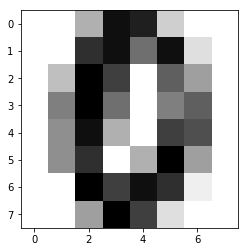

In [25]:
import matplotlib.pyplot as plt
# import matplotlib.cm.binary as bn
example_x = X[666]
example_img = example_x.reshape(8, -1)
plt.imshow(example_img, cmap=plt.get_cmap('binary'))
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [6]:
from kNN import KNNClassifier
knn = KNNClassifier(3)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_predict, y_test)
score

0.9888888888888889

In [8]:
sum(y_predict == y_test) / len(y_test)

0.9888888888888889

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_sk = KNeighborsClassifier(n_neighbors=3)
knn_sk.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [13]:
y_predict = knn_sk.predict(X_test)
accuracy_score(y_predict, y_test)

0.9888888888888889

### 调参K

In [12]:
best_score = 0
best_k = -1
for k in range(1, 11):
    knn_cls = KNeighborsClassifier(n_neighbors=k)
    knn_cls.fit(X_train, y_train)
    score = knn_cls.score(X_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score


print("best k = %d" % best_k)
print("best score = %s" %best_score)

best k = 4
best score = 0.9916666666666667


### 是否考虑距离

In [26]:
best_method = ""
best_score = 0
best_k = -1
for method in ["uniform", "distance"]:
    for k in range(1, 11):
        knn_cls = KNeighborsClassifier(n_neighbors=k, weights=method)
        knn_cls.fit(X_train, y_train)
        score = knn_cls.score(X_test, y_test)
        if score > best_score:
            best_k = k
            best_score = score
            best_method = method

print("best k = %d" % best_k)
print("best score = %s" % best_score)
print("best method = %s" % best_method)

best k = 4
best score = 0.9916666666666667
best method = uniform


### 距离选择

In [34]:
%%time
best_p = -1
best_score = 0
best_k = -1

for k in range(1, 11):
    for p in range(1, 6):
        knn_cls = KNeighborsClassifier(n_neighbors=k, weights="distance", p=p)
        knn_cls.fit(X_train, y_train)
        score = knn_cls.score(X_test, y_test)
        if score > best_score:
            best_k = k
            best_score = score
            best_p = p

print("best k = %d" % best_k)
print("best score = %s" % best_score)
print("best p = %s" % p)

best k = 3
best score = 0.9888888888888889
best p = 5
Wall time: 20.3 s


### Grid Search

In [37]:
param_grid = [
    {
        'weights': ['uniform'],
        'n_neighbors': [i for i in range(1, 11)]
    },
    {
      'weights': ['distance'],
      'n_neighbors': [i for i in range(1, 11)],
      'p': [i for i in range(1, 11)]
    }
]

In [38]:
from sklearn.model_selection import GridSearchCV

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid)

In [41]:
%%time
grid_search.fit(X_train, y_train)

C:\Users\enmonster\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


KeyboardInterrupt: 

In [42]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=8,
           weights='distance')

In [43]:
grid_search.best_score_

0.9860821155184412

In [44]:
grid_search.best_params_

{'n_neighbors': 4, 'p': 8, 'weights': 'distance'}

In [45]:
knn_clf = grid_search.best_estimator_
knn_clf.score(X_test, y_test)

0.9861111111111112

In [47]:
%%time
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

C:\Users\enmonster\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 110 candidates, totalling 330 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   44.5s


Wall time: 2min 3s


[Parallel(n_jobs=-1)]: Done 330 out of 330 | elapsed:  2.1min finished
